# Лабораторная работа №2: Поиск особенностей в изображении

Выполнила студентка гр. 8383 Сырцова Екатерина

## Задача:
Реализовать на языке Python с использованием библиотеки OpenCV программу, выполняющее поиск окружностей в изображении путем преобразования $X_0 (Hough)$
### Входные данные:
1.	цветное изображение в формате bmp, jpg
2.	минимальное расстояние между центрами окружностей;
3.	минимальный радиус окружности;
4.	максимальный радиус окружности.
### Выходные данные:
1.	цветное изображение в формате bmp (result.bmp)

## Выполнение работы

1. Считаем входное цветное изображение в формате jpg из папки:

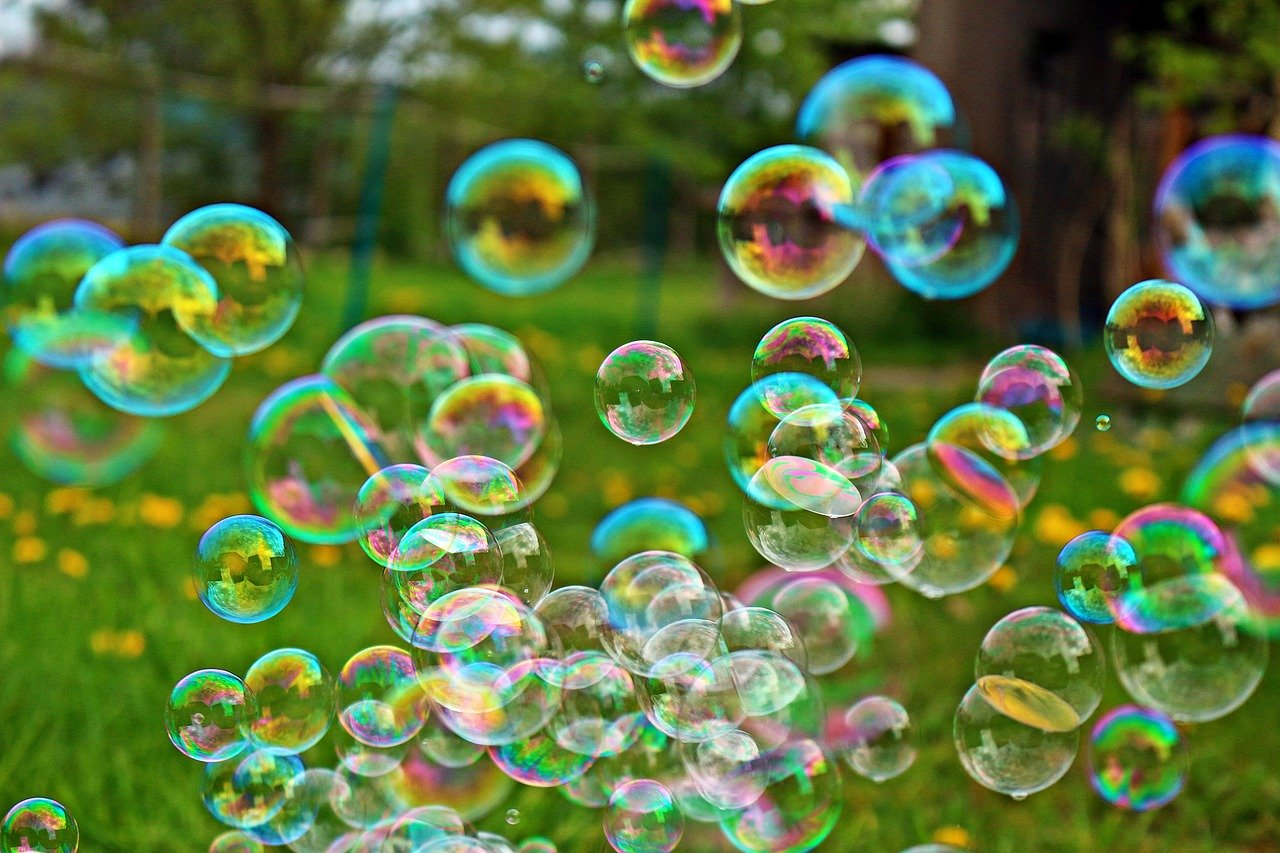

In [76]:
import cv2 as cv2
import numpy as np
from IPython.display import display
from PIL import Image

image = cv2.imread('2.jpg', cv2.IMREAD_COLOR)
display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

2. Поэксперементировав с различными вариантами входных данных, таких как минимальное расстояние между центрами окружностей, минимальный и максимальный радиусы окружностей, было получено оптимальное изображение, неперегруженное найденными кругами. Входные параметры (80, 40, 100).

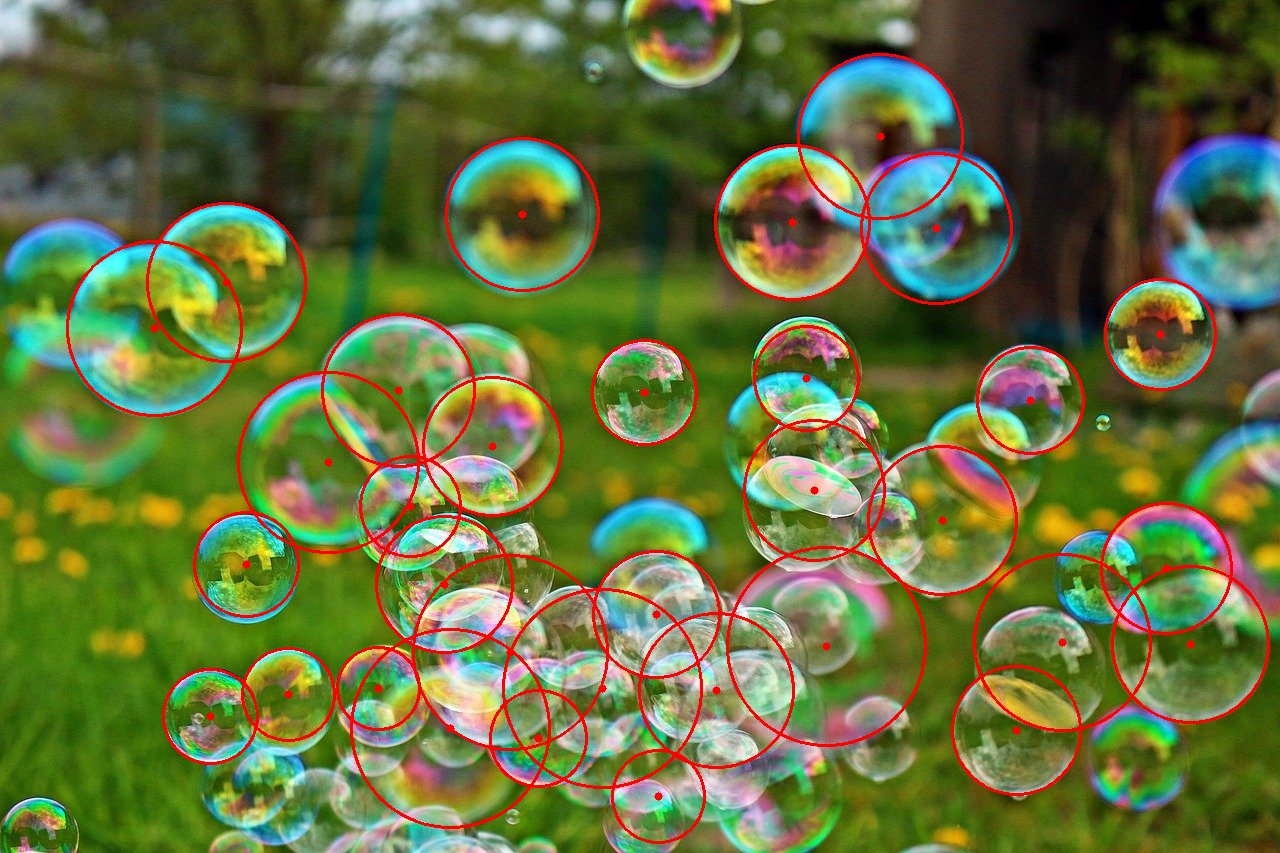

In [77]:
def circles(image, r, min_R, max_R):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, r, param1=90, param2=50, minRadius=min_R, maxRadius=max_R)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            cv2.circle(image, center, 1, (0,0,255), 5)
            R = i[2]
            cv2.circle(image, center, R, (0,0,255), 2)
    return image


result = circles(image, 80, 40, 100)
display(Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)))

3. Сохраним полученный результат в файл result_2.bmp.

In [78]:
cv2.imwrite("result.bmp", result)

True

## Выводы
В процессе выполнения данной лабораторной работы были рассмотрены преобразования Хафа для поиска окружностей в изображении. Была реализована программа с использованием методов библиотеки OpenCV и получены соответствующие результаты.
